タイトル

過去1ヶ月の地震データ分析：マグニチュードと深さの関係

作品の説明
データ分析 (やったこと)

・requestsでUSGSの地震データ（過去1ヶ月分）を取得。

・pandasでデータを読み込み、DataFrameとして処理。

・全地震総数、最大マグニチュード（M6.8）の地震情報、日本で発生した地震の数（88件）を算出・表示しました。

データ可視化 (やったこと)
・地震の「マグニチュード（mag）」を横軸、「深さ（depth）」を縦軸とした散布図を作成しました。

わかったこと・感じたこと

散布図から、ほとんどの地震は深さ100km未満の浅い場所で発生していることが視覚的にわかります。
一方で、マグニチュード4〜5付近には、深さ600kmを超えるような非常に深い地震（深発地震）も存在することが確認できました。
今回観測された最大の地震（M6.8）は、比較的浅い場所で発生していることも読み取れます。
コードを実行し、実際のデータを分析・可視化することで、単なる数値の羅列では分からない地震の傾向や実態を具体的に把握することができました。

In [5]:
import pandas as pd
import requests

# --- 元のコード ---
# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示 (確認用)
print("--- データの先頭5行 (確認用) ---")
print(data.head())
print("\n" + "="*30 + "\n")


print("--- チャレンジ1: データの取得と表示 ---")

# 1. 過去1ヶ月に報告された地震の総数
# DataFrameの行の総数が、地震の総数になります
total_earthquakes = len(data)
print(f"1. 過去1ヶ月の地震の総数: {total_earthquakes}")

print("-" * 20) # 区切り線

# 2. 最大マグニチュードの地震とその発生場所と日にち
# 'mag'列 (マグニチュード) で最大値を持つ行のインデックス(番号)を見つけます
max_mag_index = data['mag'].idxmax()

# そのインデックスを使って、行全体の情報を取得します
max_mag_earthquake = data.loc[max_mag_index]

# 必要な情報を取り出します
max_magnitude = max_mag_earthquake['mag']
max_mag_location = max_mag_earthquake['place']
max_mag_date = max_mag_earthquake['time']

print("2. 最大マグニチュードの地震:")
print(f"   マグニチュード: {max_magnitude}")
print(f"   発生場所: {max_mag_location}")
print(f"   日にち: {max_mag_date}")

print("-" * 20) # 区切り線

# 3. 日本での地震の数
# 'place'列 (場所) の文字列に 'Japan' が含まれているかを確認します

is_japan = data['place'].str.contains('Japan', na=False)

# 'Japan' が含まれる行だけを抽出（フィルタリング）します
japan_earthquakes = data[is_japan]

# その行数 (つまり地震の数) をカウントします
num_japan_earthquakes = len(japan_earthquakes)

print(f"3. 日本での地震の数: {num_japan_earthquakes}")

--- データの先頭5行 (確認用) ---
                       time   latitude   longitude  depth   mag magType   nst  \
0  2025-11-12T00:51:25.480Z  35.696667 -117.595167   3.16  0.94      ml  26.0   
1  2025-11-12T00:44:55.560Z  38.760834 -122.737999   1.51  1.40      md  14.0   
2  2025-11-12T00:32:06.000Z  34.154833 -117.656167  10.46  0.98      ml  25.0   
3  2025-11-12T00:29:23.247Z  39.812100  143.256400  35.00  5.40     mww  69.0   
4  2025-11-12T00:10:03.840Z  35.088000 -119.096500  12.28  2.28      ml  62.0   

     gap     dmin   rms  ...                   updated  \
0   55.0  0.11880  0.12  ...  2025-11-12T00:54:55.264Z   
1  100.0  0.01030  0.03  ...  2025-11-12T00:46:33.353Z   
2   62.0  0.06362  0.17  ...  2025-11-12T00:36:06.213Z   
3   99.0  1.94000  0.79  ...  2025-11-12T00:54:30.975Z   
4   25.0  0.03113  0.24  ...  2025-11-12T00:13:35.333Z   

                        place        type horizontalError depthError  \
0  11 km NE of Ridgecrest, CA  earthquake            0.14      0.620 

フォント 'Yu Gothic' を設定しました。

--- チャレンジ5: 地震のマグニチュードを視覚化 ---



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


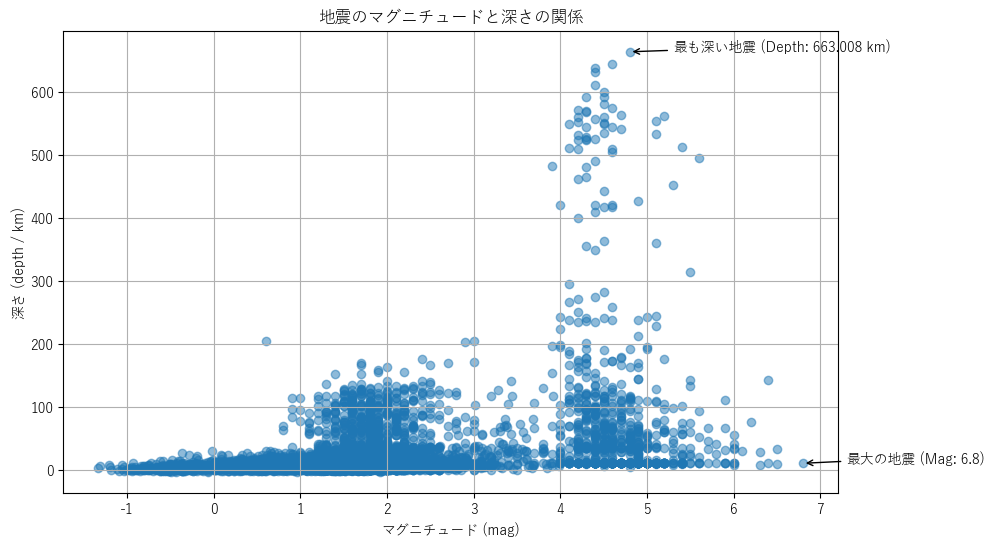

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


try:
    
    !pip install japanize-matplotlib -q
    import japanize_matplotlib
    print("Japanize-matplotlibを有効にしました。")
except ImportError:
    
    try:
        
        font_name = 'Yu Gothic' 
        plt.rcParams['font.family'] = font_name
        plt.rcParams['axes.unicode_minus'] = False # マイナス記号の文字化け防止
        print(f"フォント '{font_name}' を設定しました。")
    except Exception as e:
        print(f"日本語フォントの設定に失敗しました: {e}。グラフのラベルが文字化けする可能性があります。")
        
        pass




print("\n--- チャレンジ5: 地震のマグニチュードを視覚化 ---")

#散布図の作成
plt.figure(figsize=(10, 6)) # グラフのサイズを指定
plt.scatter(data['mag'], data['depth'], alpha=0.5)


plt.title('地震のマグニチュードと深さの関係')
plt.xlabel('マグニチュード (mag)')
plt.ylabel('深さ (depth / km)')


max_mag_idx = data['mag'].idxmax()
max_mag_data = data.loc[max_mag_idx]

plt.annotate(
    f'最大の地震 (Mag: {max_mag_data["mag"]})',
    xy=(max_mag_data['mag'], max_mag_data['depth']),
    xytext=(max_mag_data['mag'] + 0.5, max_mag_data['depth']),
    
    arrowprops=dict(facecolor='red', arrowstyle='->')
)


deepest_idx = data['depth'].idxmax()
deepest_data = data.loc[deepest_idx]

plt.annotate(
    f'最も深い地震 (Depth: {deepest_data["depth"]} km)',
    xy=(deepest_data['mag'], deepest_data['depth']),
    xytext=(deepest_data['mag'] + 0.5, deepest_data['depth']),
    # (修正点) arrowpropsから 'shrink=0.05' を削除
    arrowprops=dict(facecolor='blue', arrowstyle='->')
)

# グリッド（補助線）を表示
plt.grid(True)


plt.show()